In [1]:
import tensorflow as tf

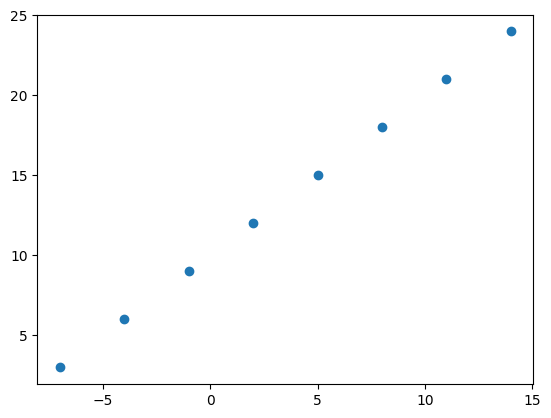

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7,-4,-1,2,5,8,11,14])
y = np.array([3,6,9,12,15,18,21,24])

plt.scatter(X,y)

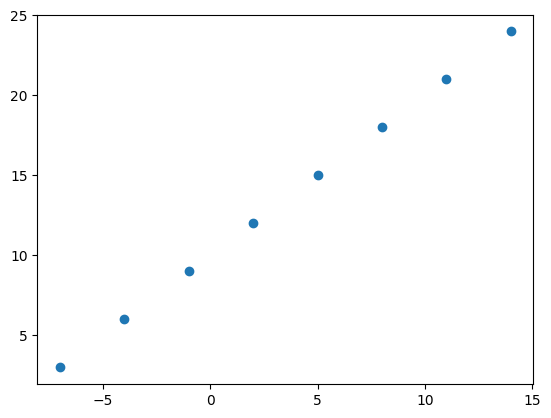

In [3]:
X = tf.constant([-7,-4,-1,2,5,8,11,14])
y = tf.constant([3,6,9,12,15,18,21,24])

plt.scatter(X,y)

In [4]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['mae'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 826ms/step - loss: 13.3708 - mae: 13.3708
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4953 - mae: 12.4953
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6230 - mae: 11.6230
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.7543 - mae: 10.7543
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 9.8791 - mae: 9.8791
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0331 - mae: 9.0331
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3209 - mae: 8.3209
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.5889 - mae: 7.5889
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 6.8325 - mae: 6.8325
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.0584 - mae: 6.0584
Epoch 11/100
1/1 [==============================] - 0s 16ms/

In [5]:
model.predict([17])

1/1 [==============================] - 0s 109ms/step


array([[26.831856]], dtype=float32)

In [6]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [7]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

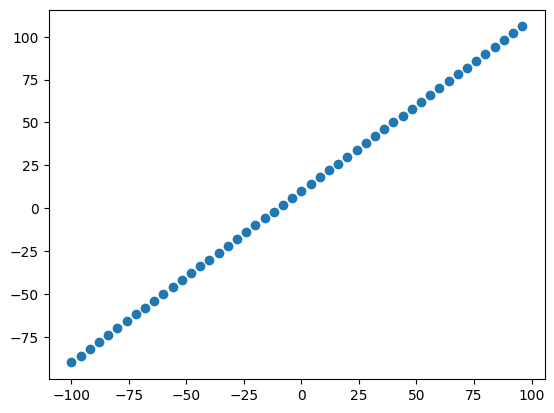

In [8]:
plt.scatter(X,y)

In [9]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

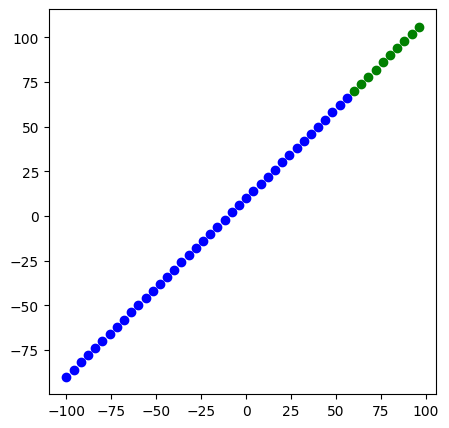

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train, c='b', label = 'Training data')
plt.scatter(X_test,y_test, c='g', label = 'Test data');

In [77]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer'),

])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [78]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.fit(X_train,y_train, epochs=100,verbose=0)

In [80]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


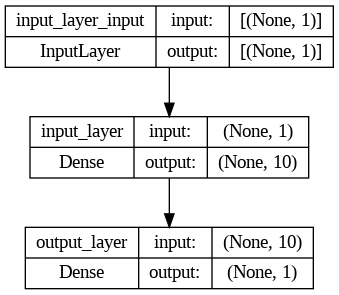

In [81]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [82]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


In [83]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [84]:
y_preds

array([[ 69.55171 ],
       [ 74.075905],
       [ 78.600105],
       [ 83.124306],
       [ 87.648506],
       [ 92.1727  ],
       [ 96.6969  ],
       [101.22109 ],
       [105.7453  ],
       [110.2695  ]], dtype=float32)

In [85]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


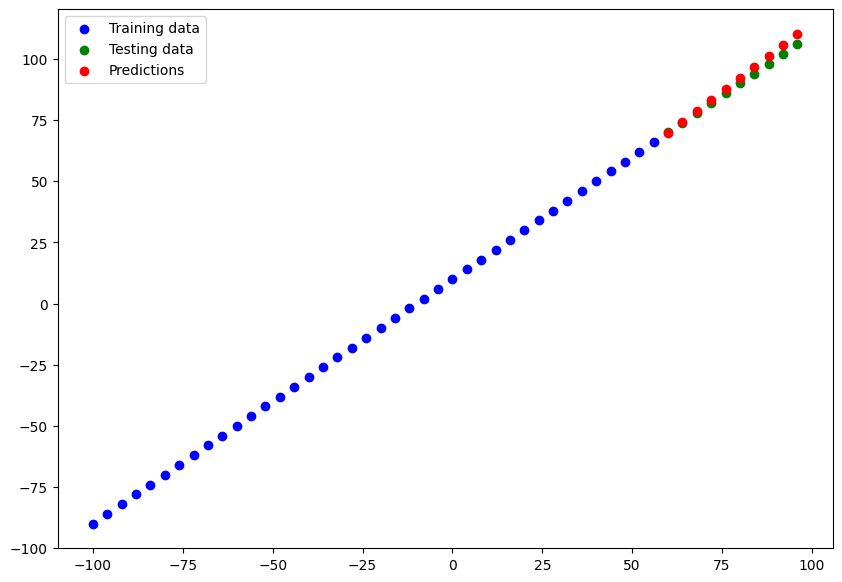

In [86]:
plot_predictions()

In [87]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 312ms/step - loss: 2.0003 - mae: 2.0003


[2.000262498855591, 2.000262498855591]

In [88]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [92]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.55171 ,  74.075905,  78.600105,  83.124306,  87.648506,
        92.1727  ,  96.6969  , 101.22109 , 105.7453  , 110.2695  ],
      dtype=float32)>

In [93]:
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.00026>

In [94]:
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.9173713>

In [95]:
model.save('best_model')